In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from glob import glob
import cv2
import nibabel as nib

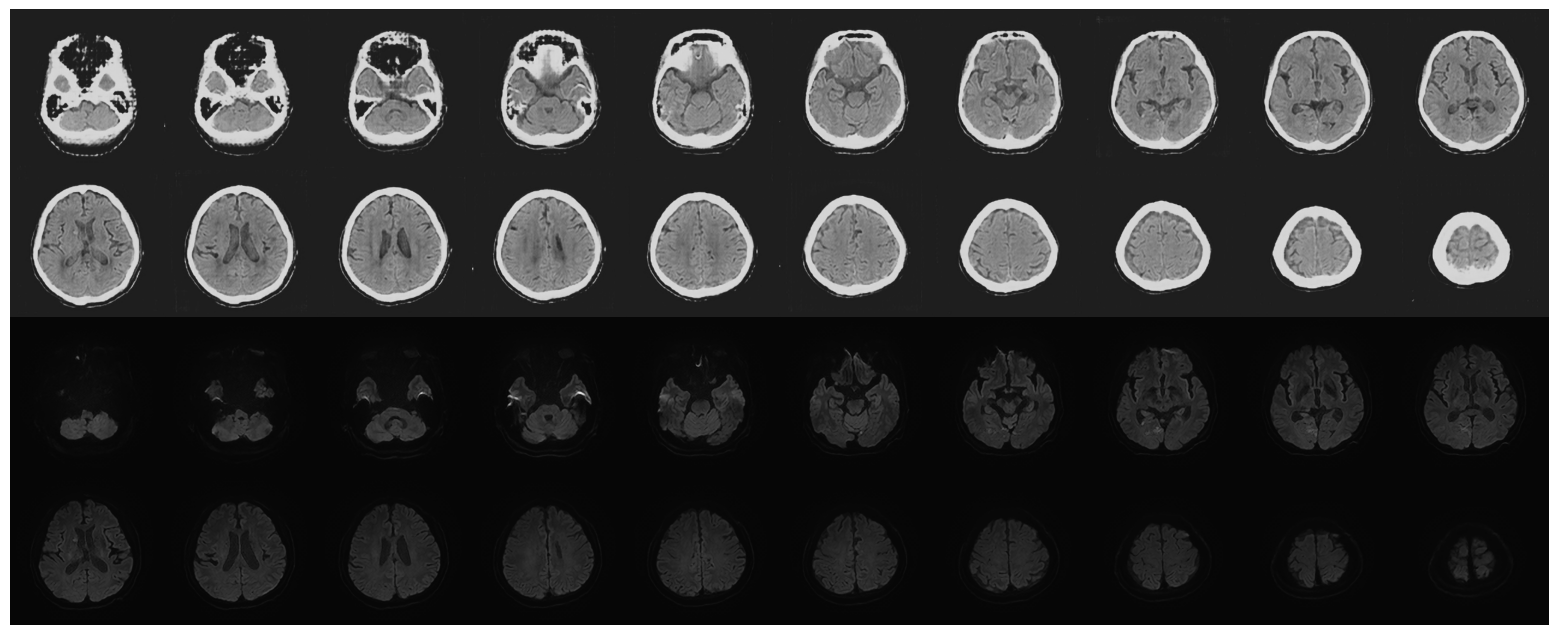

In [75]:
ct_list=glob('../../result/generator_sr/Ischemic_CT/000422/*.png')
ct_list.sort()
mri_list=[f.replace('CT', 'DWI') for f in ct_list]

plt.subplots(4, 10, figsize=(19.85, 8))
for i in range(20):
    ct = cv2.imread(ct_list[i*3])
    mri = cv2.imread(mri_list[i*3])
    plt.subplot(4, 10, i + 1)
    plt.imshow(ct,cmap='gray')
    plt.axis('off')
    plt.subplot(4, 10, i + 21)
    plt.imshow(mri,cmap='gray')
    plt.axis('off')
plt.subplots_adjust(wspace=0, hspace=0)


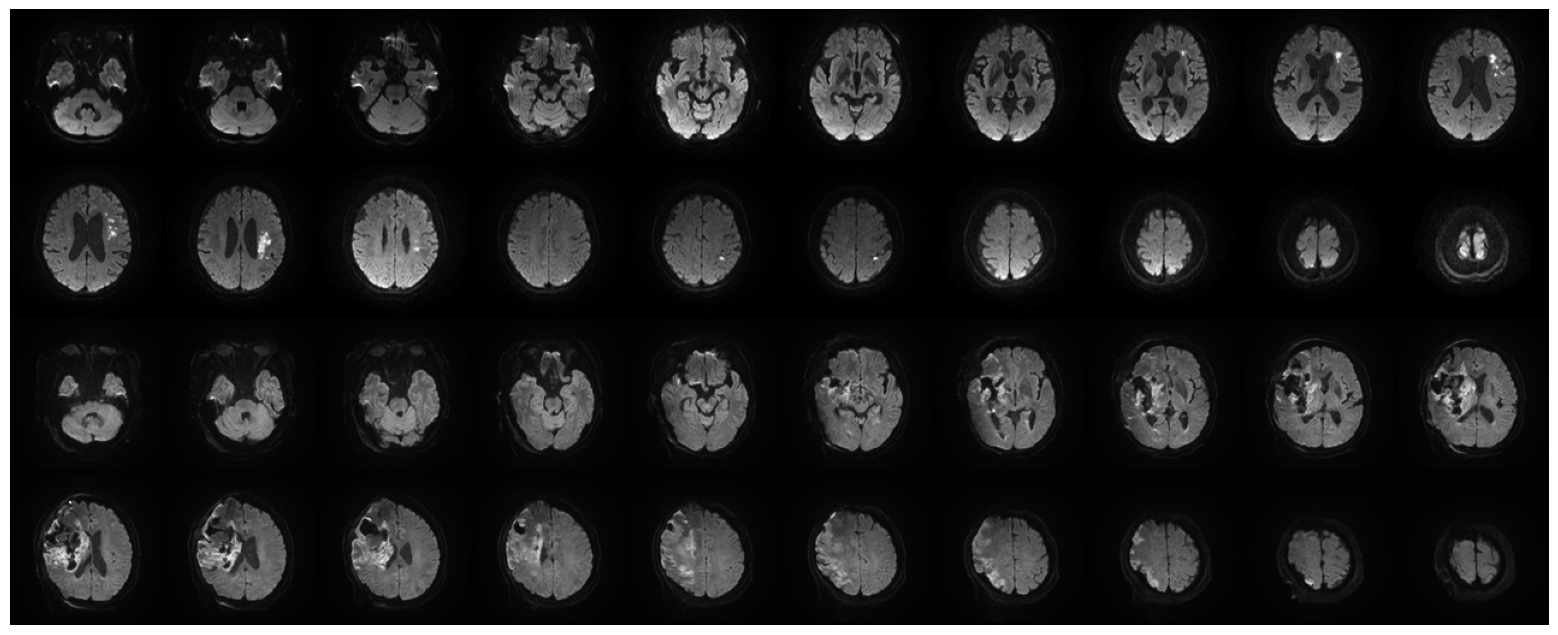

In [75]:
real_swi_nii=nib.load('../../data/stroke_mri_nii/images/ANO1_0566.nii.gz').get_fdata()+1
fake_swi_nii=nib.load('../../result/generator/Ischemic_DWI/1.0_ANO1_0565.nii.gz').get_fdata()+1
real_swi_nii= ((real_swi_nii/2)*255).astype(np.uint8)
fake_swi_nii=  ((fake_swi_nii/2)*255).astype(np.uint8)

plt.subplots(4, 10, figsize=(19.85, 8))
for i in range(20):
    real = real_swi_nii[i*3]
    fake = fake_swi_nii[i*3]
    plt.subplot(4, 10, i + 1)
    plt.imshow(real,cmap='gray')
    plt.axis('off')
    plt.subplot(4, 10, i + 21)
    plt.imshow(fake,cmap='gray', vmin=0, vmax=255)
    plt.axis('off')
plt.subplots_adjust(wspace=0, hspace=0)

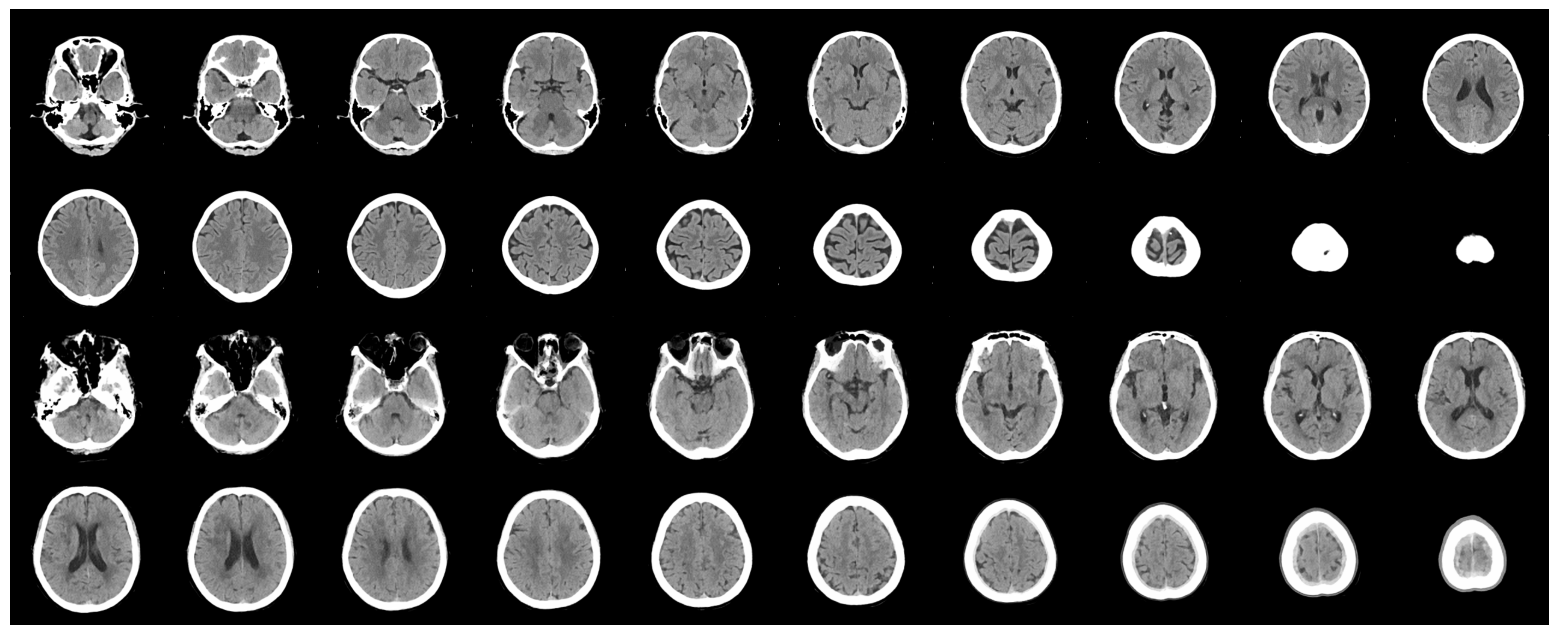

In [ ]:

fake_ct_list=glob('../../result/generator_sr/Ischemic_CT/000111/*.png')
real_ct_nii=nib.load('../../data/stroke_ct_nii_256/images/Normal/ANO3_1006.nii.gz').get_fdata()+1
real_ct_nii=  ((real_ct_nii/2)*255).astype(np.uint8)
plt.subplots(4, 10, figsize=(19.85, 8))
for i in range(20):
    fake_ct = cv2.imread(fake_ct_list[i*3])
    real_ct = real_ct_nii[i*2]
    plt.subplot(4, 10, i + 1)
    plt.imshow(real_ct,cmap='gray', vmin=0, vmax=255)
    plt.axis('off')
    plt.subplot(4, 10, i + 21)
    plt.imshow(fake_ct ,cmap='gray', vmin=0, vmax=255)
    plt.axis('off')
plt.subplots_adjust(wspace=0, hspace=0)

In [31]:
swi_nii=nib.load('../../result/generator/swi/real/3212613.nii.gz').get_fdata()
swi_nii=swi_nii-swi_nii.min()
swi_nii=swi_nii/swi_nii.max()
folder_path='../../result/generator/swi/real/3212613/'
def create_directory(folder_path):
    import os
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

create_directory(folder_path)
for i in range(len(swi_nii)):
    img = swi_nii[i]
    img=(img * 255).astype(np.uint8)
    cv2.imwrite(f'{folder_path}/{i:03d}.png', img)